In [1]:
using JLD

In [2]:
push!(LOAD_PATH, "../CSDA/")

4-element Array{String,1}:
 "@"       
 "@v#.#"   
 "@stdlib" 
 "../CSDA/"

In [3]:
arx="/home/karel/ElectroNeuroTools/JLDFiles/4AP/DatosLFP4APusadosPaper.jld"
dic=jldopen(arx)
names(dic)

4-element Array{String,1}:
 "CSDALindenberg"
 "LFP"           
 "kCSDCorrecta"  
 "notacsd"       

In [4]:
csda=read(dic["CSDALindenberg"])
lfp=read(dic["LFP"]);
freq=7.022 # por default en la matriz vieja, kHz

7.022

In [5]:
n=300
(a,b,nmax)=size(lfp)

(64, 64, 1402)

In [6]:
using PyPlot

In [7]:
using Statistics

In [8]:
slfp=std(lfp)
scsd=std(csda)

55.35047f0

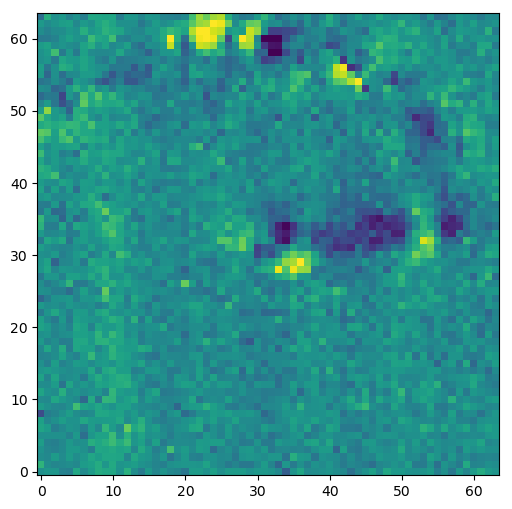

PyObject <matplotlib.image.AxesImage object at 0x7f8d63ae36a0>

In [9]:
ff=figure(figsize=(6,6))
v=5*slfp

n=700
imshow(lfp[:,:,n], vmin=-v, vmax=v, origin="lower", interpolation="nearest")

In [11]:
using LindenbergOperadores

┌ Info: Recompiling stale cache file /home/karel/.julia/compiled/v1.0/LindenbergOperadores.ji for LindenbergOperadores [top-level]
└ @ Base loading.jl:1190


In [12]:

aux1=zeros(a,b,nmax)
for n=1:nmax
   # aux1[:,:,t]=GaussianSmooth(lfpplanchado[:,:,t])
    aux1[:,:,n]=GaussianSmooth(csda[:,:,n])
end


In [55]:
scsd2=std(aux1)

10.068129214856711

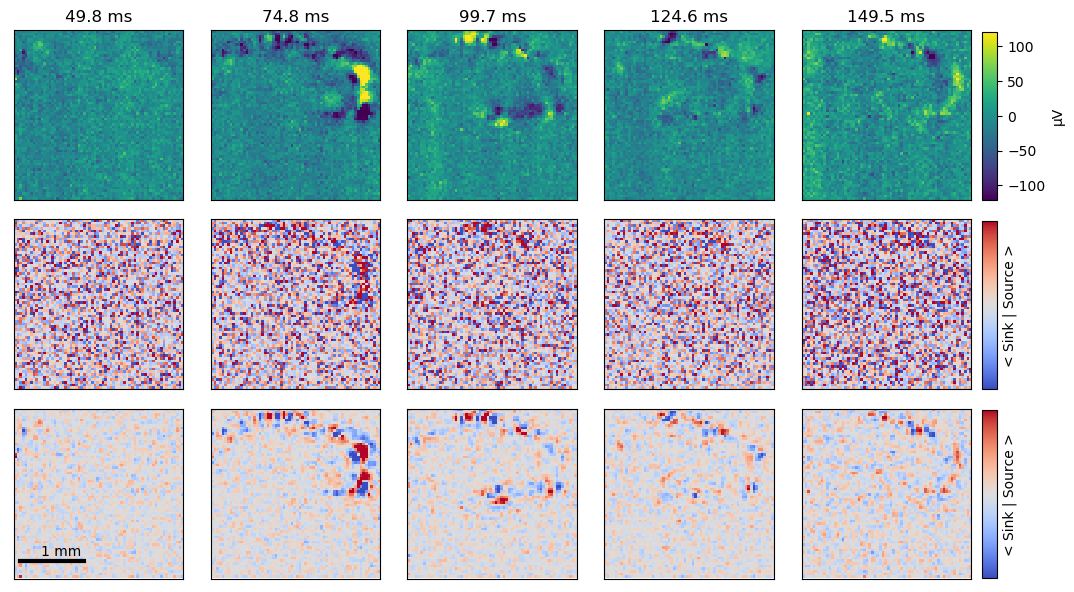

In [57]:
l=2
farofa,lista=subplots(3,5, figsize=(5*l, 3*l))
sens=5.0
vl=sens*slfp
vc=sens*scsd/3
vc2=sens*scsd2
paso=175
figlfp=0
figcsd=0
for j=1:5
    
    n=paso*(j+1)
    t=round(n/freq, digits=1)
    
    lista[1,j].set_title("$t ms")
    figlfp=lista[1,j].imshow(lfp[:,:,n], vmin=-vl, vmax=vl, origin="lower")
    figcsd=lista[2,j].imshow(csda[:,:,n], vmin=-vc, vmax=vc, origin="lower", cmap="coolwarm")
    lista[3,j].imshow(aux1[:,:,n], vmin=-vc2, vmax=vc2, origin="lower", cmap="coolwarm")    
    
    for k in (1,2,3)
    lista[k,j].set_xticks([])
    lista[k,j].set_yticks([])
    end    
    
end



cblfpaxes = farofa.add_axes([0.99, 0.66, 0.015, 0.28]) 
cbcsd1axes = farofa.add_axes([0.99, 0.345, 0.015, 0.28])  
cbcsd2axes = farofa.add_axes([0.99, 0.03, 0.015, 0.28]) 


 cbxlfp=farofa.colorbar(figlfp, cax=cblfpaxes,
    #ax=lista[:,4], 
    shrink=1.0, aspect=120
    #  location="right",
    )
    
   # cbx=colorbar(imagen, fraction=0.045) 
  cbxlfp.set_label("µV") 

 cbxcsd1=farofa.colorbar(figcsd, cax=cbcsd1axes,
    #ax=lista[:,4], 
    shrink=1.0, aspect=120
    #  location="right",
    )
 
cbxcsd2=farofa.colorbar(figcsd, cax=cbcsd2axes,
    #ax=lista[:,4], 
    shrink=1.0, aspect=120
    #  location="right",
    )
 

  cbxcsd1.set_ticks([]) 
  cbxcsd2.set_ticks([]) 


   # cbx=colorbar(imagen, fraction=0.045) 
  cbxlfp.set_label("µV") 
  cbxcsd1.set_label("< Sink | Source >") 
  cbxcsd2.set_label("< Sink | Source >") 

  rayitax=[2,2+23+1]
  rayitay=[6,6]
  lista[3,1].plot(rayitax,rayitay, lw=3, color="black")
  lista[3,1].annotate("1 mm", xy=(10, 8) , color="black")


tight_layout()

#savefig("LFPvsCSD_4AP.svg", dpi=92)
#savefig("LFPvsCSD_4AP.png", dpi=92)
#savefig("LFPvsCSD_4AP.pdf", dpi=92)


In [36]:
2.54/64

0.0396875

In [39]:
66*42

2772

In [50]:
2.772/64*23.1

1.00051875

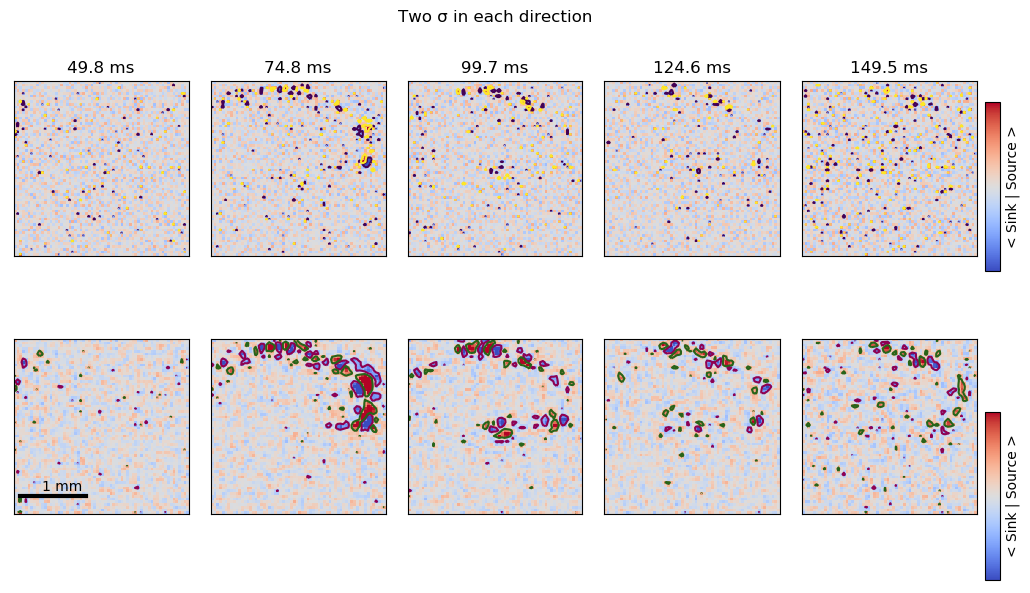

In [89]:
l=2
farofa,lista=subplots(2,5, figsize=(5*l, 3*l))
sens=5.0
vc=sens*scsd
vc2=sens*scsd2
paso=175
figlfp=0
figcsd=0

niveles=[-2,2]

farofa.suptitle("Two σ in each direction")

nivs1=collect(niveles.*scsd)
nivs2=collect(niveles.*scsd2)
for j=1:5
    
    n=paso*(j+1)
    t=round(n/freq, digits=1)
    
    lista[1,j].set_title("$t ms")
    figcsd=lista[1,j].imshow(csda[:,:,n], vmin=-vc, vmax=vc, origin="lower", cmap="coolwarm")
    lista[1,j].contour(csda[:,:,n], levels=nivs1, color="PiYG")
    
    lista[2,j].imshow(aux1[:,:,n], vmin=-vc2, vmax=vc2, origin="lower", cmap="coolwarm")    
    lista[2,j].contour(aux1[:,:,n], levels=nivs2, cmap="PiYG")
    
    
    for k in (1,2)
    lista[k,j].set_xticks([])
    lista[k,j].set_yticks([])
    end    
    
end



cbcsd1axes = farofa.add_axes([0.99, 0.545, 0.015, 0.28])  
cbcsd2axes = farofa.add_axes([0.99, 0.03, 0.015, 0.28]) 

  
 cbxcsd1=farofa.colorbar(figcsd, cax=cbcsd1axes,
    #ax=lista[:,4], 
    shrink=1.0, aspect=120
    #  location="right",
    )
 
cbxcsd2=farofa.colorbar(figcsd, cax=cbcsd2axes,
    #ax=lista[:,4], 
    shrink=1.0, aspect=120
    #  location="right",
    )
 

  cbxcsd1.set_ticks([]) 
  cbxcsd2.set_ticks([]) 


   # cbx=colorbar(imagen, fraction=0.045) 
  cbxlfp.set_label("µV") 
  cbxcsd1.set_label("< Sink | Source >") 
  cbxcsd2.set_label("< Sink | Source >") 

  rayitax=[2,2+23+1]
  rayitay=[6,6]
  lista[2,1].plot(rayitax,rayitay, lw=3, color="black")
  lista[2,1].annotate("1 mm", xy=(10, 8) , color="black")

tight_layout()

savefig("ComparaDisconexos2sigmas4AP.png", dpi=90)
savefig("ComparaDisconexos2sigmas4AP.svg", dpi=90)


In [113]:
arxcm="../JLDFiles/4AP/DatosLFP4APusadosPaper-CM.jld"
arxtray="../JLDFiles/4AP/DatosLFP4APusadosPaper-Tray-todas.jld"

"../JLDFiles/4AP/DatosLFP4APusadosPaper-Tray-todas.jld"

In [119]:
datcm=load(arxcm)
dattr=load(arxtray)

Dict{String,Any} with 3 entries:
  "nota"              => "longitud minima fue 3, peso minimo fue 5 "
  "CatenarioPositivo" => Dict{Integer,Array{Any,N} where N}(288=>[41.2486 58.15…
  "CatenarioNegativo" => Dict{Integer,Array{Any,N} where N}(306=>[31.5812 29.32…

In [120]:
cmpos=datcm["CMP"]
cmneg=datcm["CMN"];
notacm=datcm["notacm"]

"Se separaron los componentes con 2.0 desv. est. del CSD suavizado gaussiano"

In [121]:
keys(datcm)

Base.KeySet for a Dict{String,Any} with 3 entries. Keys:
  "CMP"
  "CMN"
  "notacm"

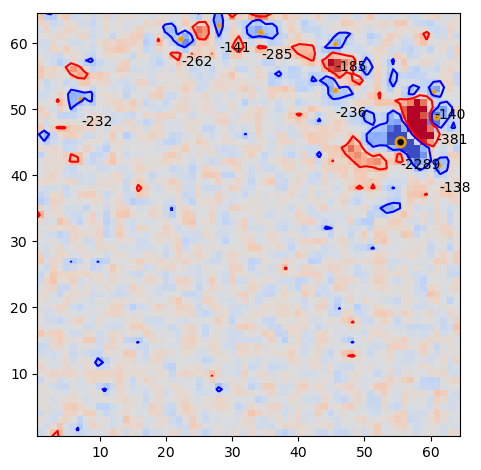

In [128]:
n=475
extt=[0.5,64.5, 0.5,64.5]


excsd=aux1[:,:,n]
imshow(excsd, cmap="coolwarm", vmin=-80,vmax=80, origin="lower", extent=extt)
xxneg=cmneg[n][:,1]
yyneg=cmneg[n][:,2]
valorneg=cmneg[n][:,3]
scatter(xxneg, yyneg,s=0.02*abs.(valorneg), alpha=0.9, c="black", 
    edgecolors="orange", lw=2)
contour(excsd, levels=nivs2, colors=("blue", "red"), 
    extent=extt, interpolation="none")


for j in 1:size(valorneg,1)
    annotate(round(Int,valorneg[j]),xy=(xxneg[j],yyneg[j]-4))
end

tight_layout()
#savefig("EjemploFronteraComponentesDisjuntos01.svg")

In [71]:
extrema(aux1[:,:,400])

(-105.1370876055908, 34.30052913726807)

In [79]:
collect(-4:2:4)

5-element Array{Int64,1}:
 -4
 -2
  0
  2
  4

In [98]:
v

120.84204115650594